In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
def generate_gaussian_data(dim, n_points):
    def inside_circle(point, center, r):
        return np.linalg.norm(point - center) <= r
    
    points = [[random.random()*10 for _ in range(dim)] for _ in range(n_points)]
    labels = []
    for point in points:
        if inside_circle(np.array(point), np.array([5 for _ in range(dim)]), 4) and random.random() < 0.99:
            labels.append(1)
        else:
            if random.random() < 0.99:
                labels.append(0)
            else:
                labels.append(1)

    d = {str(i):[] for i in range(dim)}
    d["label"] = []
    for (point, l) in zip(points, labels):        
        for i in range(len(point)):
            d[str(i)].append(point[i])
        d["label"].append(l)
    df = pd.DataFrame.from_dict(d)

    X = df[[str(i) for i in range(dim)]].as_matrix()

    y = np.array(df["label"])

    return X, y, df

X, y, df = generate_gaussian_data(2, 1000)
Xte, yte, df_te = generate_gaussian_data(2, 500)
# plt.scatter(X[:,1],X[:,2], c=y)
# plt.scatter(X[:,0],X[:,1], c=y)

In [22]:
df.to_csv("gaus_2D_train.csv")
df_te.to_csv("gaus_2D_test.csv")

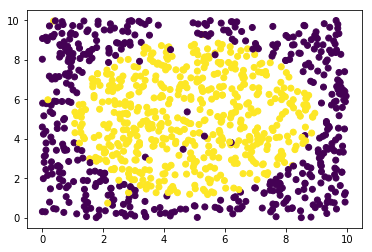

In [20]:
plt.scatter(X[:,0],X[:,1], c=y)

In [23]:
len(np.where(y)[0])

496

In [ ]:
X,y = get_XY("data/gaus_2D_train.csv");
Xte, yte = get_XY("data/gaus_2D_test.csv");

In [8]:
df.to_csv("gaussian_200_points_200D_test.csv")

In [4]:
def generate_linear_data(dim):    
    points = [[random.random()*10 for _ in range(dim)] for _ in range(200)]
    labels = []
    coeffs = [random.randint(0,10) for _ in range(dim)]

    for point in points:
        running_sum = 0
        for i in range(len(point)):
            running_sum += coeffs[i]*point[i]
        if running_sum > 4743.96:
            labels.append(1)
        else: 
            labels.append(0)

    d = {str(i):[] for i in range(dim)}
    d["label"] = []
    coeffs = [random.randint(0,10) for _ in range(dim)]
    for (point, l) in zip(points, labels):
        for i in range(len(point)):
            d[str(i)].append(point[i])
        d["label"].append(l)
        
    d["ones"] = [1 for _ in range(len(d["1"]))]
    df = pd.DataFrame.from_dict(d)
    X = df[["ones"] + [str(i) for i in range(dim)]].as_matrix()
    y = np.array(df["label"])
    return X, y, df